## The Hyperbolic Plane

The M&ouml;bius transformations of the Complex Plane open a door onto a new, non-Euclidean, geometry. This is a place where **Euclid's parallel postulate:** *given a line, L, and a point, p, not on L, there exists exactly one line through p parallel to L* is replaced with the **hyperbolic parallel postulate:** *given a line, L, and a point, p, not on L, there exist infinitely many lines through p parallel to L*.

### Planar Curves and Euclidean Distance

Everybody "knows" that the shortest distance between two points is a straight line. In fact, **the distance** between two points is **defined** to be the length of the shortest curve connecting these two points.

A **curve** $\Gamma\subset\maC$ with endpoints $z_1$ and $z_2$ is **parametrized** by a piecewise smooth function, say $\gamma$, from a real interval, $[a,b]$, into $\maC$ such that $\gamma(a)=z_1$ and $\gamma(b)=z_2$. For example, $\gamma_L(t)\equiv t + it$ describes a straight line from $z_1=0$ to $z_2=1+i$ as $t$ travels from $0$ to $1$. Its length, $\sqrt 2$, follows immediately from the Pythagorean Theorem. If we instead consider the curved path $\gamma_P(t)\equiv t + it^2$, its length is not so obvious. The key notion is to add up the length of its tangent vectors as $t$ travels from $0$ to $1$. Now the derivative, 

\begin{equation*}
  \frac{d}{dt}\gamma(t)
\end{equation*}

abbreviated $\gamma'(t)$, produces the tangent vector to $\Gamma$ at $\gamma(t)$. For example, $\gamma'_P(t)=1+2it$, as
depicted in Figure \ref{fig:ctan}. The only notion of length we have so far broached is the **Euclidean length**

\begin{equation}\label{eq:Eleng}
  |\gamma'(t)| \equiv \sqrt{\gamma'(t)\ov\gamma'(t)} = \sqrt{(\Re\gamma'(t))^2 + (\Im\gamma'(t))^2}
\end{equation}

Now, to add up these lengths over the course of the parameter, $t$, is to integrate $|\gamma'(t)|$ from $a$ to $b$. This suggests that we define the Euclidean Length of the curve $\Gamma$ to be

\begin{equation}\label{eq:Elen}
  E(\Gamma) \equiv \int_a^b |\gamma'(t)|\,dt
\end{equation}

For the straight line this yields

\begin{equation}\label{eq:ElenL}
  E(\Gamma_L) \equiv \int_0^1 |\gamma'_L(t)|\,dt = \int_0^1 |1+i|\,dt = \int_0^1 \sqrt{2}\,dt = \sqrt 2
\end{equation}

as expected. For the parabolic arc we find

\begin{equation}\label{eq:ElenP}
  E(\Gamma_P) \equiv \int_0^1 |\gamma'_P(t)|\,dt = \int_0^1 |1+2ti|\,dt = \int_0^1 \sqrt{1+4t^2}\,dt \ge 1.47 > E(\Gamma_L)
\end{equation}

where the $1.47$ comes from evaluating the integral in the code cell below

In [16]:
# Euclidian Arc Length Two ways

import numpy as np    # numerically
dt = 0.001   # time step
t = np.arange(dt/2,1,dt) # midpoints of intervals [0,dt], [dt, 2dt], ..., [1-dt,1]
E = sum(np.sqrt(1+4*t**2))*dt  # Riemann sum of areas of rectangles
print('E_Riemann = ', E)

import sympy as sym    # symbolically
t = sym.symbols('t')
c = sym.symbols('c')
E = sym.integrate(sym.sqrt(1+4*t**2) , (t, 0, 1))   # exact integration
print('E_Sym = ', E)    # in symbols
print('E_Sym evaluated = ', sym.N(E))  # numerical evaluation

E_Riemann =  1.478942783008998
E_Sym =  asinh(2)/4 + sqrt(5)/2
E_Sym evaluated =  1.47894285754460


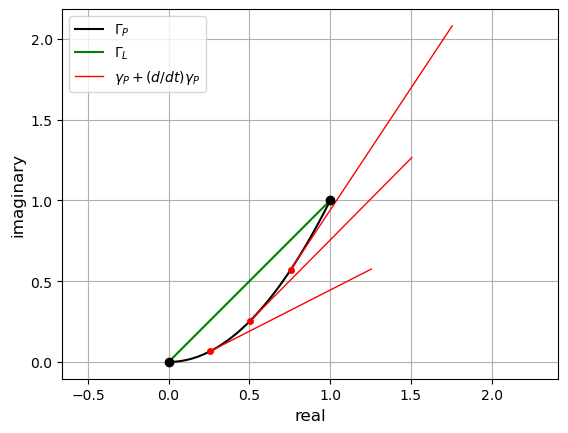

In [2]:
# curve with tangents

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

dt = 0.01
t = np.arange(dt/2,1,dt)
gamma = t + 1j*t**2
plt.plot(gamma.real, gamma.imag, 'k')
plt.plot([0,1],[0,1],'g')

tc = t[25::25]
gcr = gamma.real[25::25]
gci = gamma.imag[25::25]
N = gcr.size
dgamma = 1 + 2*tc*1j

for n in range(N):
    plt.plot([gcr[n], gcr[n]+1], [gci[n], gci[n] + 2*tc[n]], 'r', linewidth=1)
    
plt.plot(gcr, gci, 'ro',markersize=4)
    
plt.legend(['$\Gamma_P$', '$\Gamma_L$', "$\gamma_P+(d/dt)\gamma_P$"])

plt.plot([0,1],[0,1],'ko')

plt.axis('equal')
plt.grid('on')
plt.xlabel('real', fontsize=12)
plt.ylabel('imaginary', fontsize=12);

\begin{myfig}\label{fig:ctan} Two curves, the straight green $\Gamma_L$, and the parabolic black $\Gamma_P$, each joining $0$ to $1+i$. We also plot red tangent vectors to $\Gamma_P$ at three locations. \end{myfig}


\begin{exercise}\label{ex:circum}
Use (\ref{eq:Elen}) to confirm that the circumference of the circle, $C$, of radius $r$ centered at $z$ is $2\pi r$.
You may use the parametrization $\gamma_C(t) = \Re z + r\cos(t) + i(\Im z + r\sin(t))$ for $t\in[0,2\pi]$.
\end{exercise}

\begin{exercise}\label{ex:Einv}
Suppose $\Gamma$ is a curve in $\maC$ parametrized by $\gamma(t)$ for $0\le t\le 1$. We will now confirm that its length does not change when translated and/or rotated.

(a) For $z_0\in\maC$ denote by 

\begin{equation*}
\Gamma_0=\{z_0+\gamma(t):0\le t\le 1\}
\end{equation*}

the translation of $\Gamma$ by $z_0$. Show that $E(\Gamma_0)=E(\Gamma)$.

(b) For $\theta\in[0,2\pi)$ denote by 

\begin{equation*}
\Gamma_\theta=\{\cos(\theta)\Re\gamma(t) - \sin(\theta)\Im\gamma(t) + i(\sin(\theta)\Re\gamma(t) + \cos(\theta)\Im\gamma(t)): 0\le t\le 1\}
\end{equation*}

the counterclockwise rotation of $\Gamma$ around the origin by the angle $\theta$. Show that $E(\Gamma_\theta)=E(\Gamma)$.

\end{exercise}


Now to argue in general that the straight line is the shortest curve from $z_1$ to $z_2$ we note that curve length does not change when we translate or rotate a curve. As such, we suppose $z_1=0$ and $z_2=x_2$ and note that the straight line, $\Gamma_L$, is parametrized by $\gamma_L(t)=tx_2$ for $0\le t\le 1$. If $\gamma$ parametrizes any competing curve, $\Gamma$, then

\begin{equation}\label{eq:Ecomp}
  E(\Gamma) = \int_0^1 \sqrt{(\Re\gamma'(t))^2 + (\Im\gamma'(t))^2}\,dt \ge \int_0^1 \sqrt{(\Re\gamma'(t))^2}\,dt 
  \ge \int_0^1 \Re\gamma'(t) \,dt = \Re\int_0^1 \gamma'(t) \,dt = \Re(\gamma(1)-\gamma(0)) = x_2 = E(\Gamma_L)
\end{equation}



### Hyperbolic Distance

If we restrict ourselves to **real** M&ouml;bius transformations of a **complex** variable we arrive at tractable expression of their real and imaginary parts. In particular, for $z=x+iy$, we find

\begin{equation}\label{eq:muRI}
 \eqalign{
  \mu(z) = \frac{az+b}{cz+d} = \frac{(az+b)(c\ov z+d)}{|cz+d|^2} &= \frac{ac|z|^2+bd + (ad+bc)x + (ad-bc)iy}{|cz+d|^2} \cr
  &= \frac{ac|z|^2+bd + (ad+bc)x}{|cz+d|^2} + i\frac{y}{|cz+d|^2} \cr}
\end{equation}

The imaginary part is specially intriguing, namely

\begin{equation}\label{eq:muRI2}
  \Im\mu(z) = \frac{\Im z}{|cz+d|^2}
\end{equation}

has the immediate consequence that real M&ouml;bius transformations take the upper halfplane

\begin{equation}\label{eq:UHP}
   \maU \equiv \{z\in\maC:\Im z >0\}
\end{equation}

to itself. 


Let's suppose $\gamma$ is a curve and examine its distortion by $\mu$. Well

\begin{equation}\label{eq:mudist}
  (d/dt)\mu(\gamma(t)) = \mu'(\gamma(t))\gamma'(t) = \frac{-\gamma'(t)}{(c\gamma(t)+d)^2}
\end{equation}

and so

\begin{equation}\label{eq:mudist2}
  |(d/dt)\mu(\gamma(t))| = \frac{|\gamma'(t)|}{|c\gamma(t)+d|^2} = |\gamma'(t)|\frac{\Im\mu(\gamma(t))}{\Im \gamma(t)}
\end{equation}

and this suggests we try

\begin{equation}\label{eq:Hmet}
  H(\gamma) \equiv \int_0^1 \frac{|\gamma'(t)|}{\Im\gamma(t)}\,dt
\end{equation}

so

\begin{equation}\label{eq:Hmet2}
  H(\mu(\gamma)) = \int_0^1 \frac{|(d/dt)\mu(\gamma(t))|}{\Im\mu(\gamma(t))}\,dt = \int_0^1 \frac{|\gamma'(t)|}{\Im\mu(\gamma(t))}\frac{\Im\mu(\gamma(t))}{\Im \gamma(t)}\,dt = \int_0^1 \frac{|\gamma'(t)|}{\Im\gamma(t)}\,dt = H(\gamma)
\end{equation}

That is, real M&ouml;bius transformations preserve the hyperbolic length of curves in $\maU$. We note that two other quantities are preserved.

\begin{proposition}\label{prop:Hinv2} For $z,w\in\maU$ the function

\begin{equation}\label{eq:tau}
  \tau(z,w) \equiv \frac{|z-w|}{|z-\ov w|}
\end{equation}

is $H$-invariant.
\end{proposition}

**Proof:** If $\mu$ is a real M&ouml;bius transformation then

\begin{equation}\label{eq:taumu}
  \tau(\mu(z),\mu(w)) = \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\ov \mu(w)|} = \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\mu(\ov w)|}.
\end{equation}

We next use the simplicity of $\mu'(z)$ (\ref{eq:mudist}) to compute the required difference

\begin{equation*}
  \mu(z)-\mu(w) = \int_w^z \mu'(u)\,du = \int_w^z \frac{du}{(cu+d)^2} = \frac{-1}{c}\int_w^z \frac{d}{du}\frac{du}{cu+d}
    = \frac{-1}{c}\left(\frac{1}{cz+d}-\frac{1}{cw+d}\right)
    = \frac{w-z}{(cz+d)(cw+d)}
\end{equation*}

Substitution of this into (\ref{eq:taumu}) yields

\begin{equation*}
    \frac{|\mu(z)-\mu(w)|}{|\mu(z)-\mu(\ov w)|} = \frac{|w-z|}{|cz+d||cw+d|}\frac{|cz+d||c\ov w+d|}{|\ov w - z|}
    = \frac{|z-w|}{|z-\ov w|}
\end{equation*}

as claimed. **End of Proof.**

### Hyperbolic Lines and Circles

Given two points $z_0$ and $z_1$ in $\maU$ we look for the curve joining them with the shortest hyperbolic length. Suppose that $z_0=ai$ and $z_1=bi$ where $0<a<b$. The straight line $\gamma(t)=(bt + (1-t)a)i$ so $\gamma'(t)=(b-a)i$ and

\begin{equation}\label{eq:abHL}
   H(\gamma) = \int_0^1 \frac{(b-a)}{bt + (1-t)a}\,dt = \int_0^1 (d/dt)\log(bt + (1-t)a)\,dt = \log(b)-\log(a) = \log(b/a)
\end{equation}

If $\eta$ is a competing curve we note that

\begin{equation}\label{eq:abHL2}
   H(\eta) = \int_0^1 \frac{|\eta'(t)|}{\Im\eta(t)}\,dt = 
   \int_0^1 \frac{\sqrt{(\Re\eta'(t))^2+(\Im\eta'(t))^2}}{\Im\eta(t)}\,dt \ge
   \int_0^1 \frac{|\Im\eta'(t)|}{\Im\eta(t)}\,dt \ge
   \int_0^1 \frac{\Im\eta'(t)}{\Im\eta(t)}\,dt = \log(b/a) = H(\gamma)
\end{equation}

where equality holds only when $\Re\eta'(t)=0$ and $\Im\eta'(t)\ge 0$ for each $t$, i.e., when $\eta\sim\gamma$. It follows from this that the shortest H-line connecting $x+ia$ to $x+ib$ is the usual Euclidean straight line.

Now if $z_1$ and $z_2$ do not have the same real parts, as in Figure \ref{fig:Hline2}, we note that $z_1$ and $z_2$ lie on a unique circle centered on the real axis. To find the center, $x$, we note that the perpendicular bisector of their cord strikes the real axis at $x$. The radius is then $r=|z_2-x|=|z_1-x|$. See the code cell below for details of the construction.

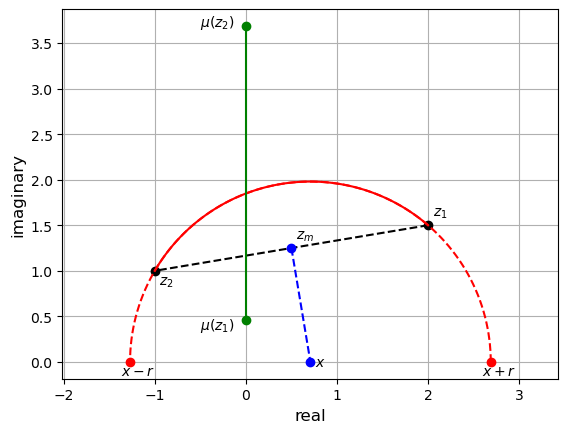

In [3]:
# Hlines as arcs

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

z2 = -1+1j
z1 = 2 + 1.5j  # 0.5+2j
plt.plot([z1.real, z2.real], [z1.imag, z2.imag], 'ko--')
plt.text(z1.real+.05, z1.imag + 0.1, '$z_1$')
plt.text(z2.real+.05, z2.imag-0.15, '$z_2$')
zm = (z1+z2)/2    # midpoint
plt.text(zm.real+.05, zm.imag+.1, '$z_m$')
m = (z1.imag - z2.imag)/(z1.real - z2.real) # slope
x = m*zm.imag + zm.real  # x-intercept of perpendicular bisector
plt.text(x.real+.05, x.imag-.05, '$x$')
r = abs(z2-x)  # radius
plt.plot([zm.real, x], [zm.imag, 0], 'bo--')
t = np.linspace(0, np.pi, 100)  # arc angle
gamma = x + r*np.cos(t) + 1j*r*np.sin(t)
plt.plot(gamma.real, gamma.imag, 'r--')
plt.plot(x+r,0,'ro')
plt.plot(x-r,0,'ro')
plt.text(x+r-.1, -.15, '$x+r$')
plt.text(x-r-.1, -.15, '$x-r$')

# now map arc from z1 to z2 using mu
t1 = np.angle(z1-x)
t2 = np.angle(z2-x)
t = np.linspace(t1, t2, 100)  # arc angle
gamma = x + r*np.cos(t) + 1j*r*np.sin(t)
plt.plot(gamma.real, gamma.imag, 'r')
y1 = np.sin(t1)/(1+np.cos(t1))
y2 = np.sin(t2)/(1+np.cos(t2))
plt.plot([0, 0], [y1, y2], 'go-')
plt.text(-.5,y1-.1,'$\mu(z_1)$')
plt.text(-.5,y2,'$\mu(z_2)$')

plt.axis('equal')
plt.grid('on')
plt.xlabel('real', fontsize=12)
plt.ylabel('imaginary', fontsize=12);

\begin{myfig}\label{fig:Hline2} The two points $z_1$ and $z_2$ lie on a unique circle, $C$, of radius $r$, centered on the real axis, at $x$. The transformation $\mu$ in (\ref{eq:mud}) takes the red arc from $z_1$ to $z_2$ to the imaginary green segment. \end{myfig}

We now delight in the M&ouml;bius transformation

\begin{equation}\label{eq:mud}
   \mu(z) = \frac{z-(x+r)}{z-(x-r)}
\end{equation}

for which $\mu(x+r)=0$ and $\mu(x-r)=\infty$ while it takes points on $C$ to the imaginary axis, more precisely

\begin{equation}\label{eq:mud2}
   \mu(x+r\cos(t)+ir\sin(t)) = \frac{x+r\cos(t)+ir\sin(t)-(x+r)}{x+r\cos(t)+ir\sin(t)-(x-r)}
   = \frac{\cos(t)-1+i\sin(t)}{\cos(t)+1+i\sin(t)}\frac{\cos(t)+1-i\sin(t)}{\cos(t)+1-i\sin(t)}
   = \frac{i\sin(t)}{1+\cos(t)}
\end{equation}

It then follows that the H-line segment joining $\mu(z_1)$ and $\mu(z_2)$ is the segment of the imaginary axis joining them. As $\mu$ is real it does not distort H-length it follows that the arc of $C$ is the H-line joining $z_1$ and $z_2$. It follows that the hyperboic distance from $z_1$ to $z_2$ is $\log(\mu(z_2)/\mu(z_1))$. As expressed by (\ref{eq:mud2}) 

\begin{equation}\label{eq:mud3}
   d_H(z_1,z_2) = \log\left(\frac{\sin(t_2)}{1+\cos(t_2)}\frac{1+\cos(t_1)}{\sin(t_1)}\right)
    \where t_j = \arg(z_j-x)
\end{equation}

this distance is cumbersome. To arrive at a more managable expression we note that $\mu(z_1) = ki$ for some $k$ and so

\begin{equation}\label{eq:muT}
   \mu_k(z) \equiv \frac{1}{k}\frac{z-(x+r)}{z-(x-r)}
\end{equation}

is a real M&ouml;bius transfromation that takes $x+r$ to $0$, $x-r$ to $\infty$ and $z_1$ to $i$. If $\mu_k(z_2)=iq$ then $q>1$ and $d_H(z_1,z_2)=d_H(\mu_k(z_1),\mu_k(z_2)) = d_H(i,iq) = \log(q)$.

In like fashion

\begin{equation}\label{eq:taumuk}
  \tau(z_1,z_2) = \tau(\mu_k(z_1),\mu_k(z_2)) = \tau(i,iq) = \frac{|i-iq|}{|i+iq|} = \frac{q-1}{q+1} = 
   \frac{\exp(d_H(z_1,z_2))-1}{\exp(d_H(z_1,z_2))+1}
\end{equation}

We solve this for $\exp(d_H(z_1,z_2))$ and take logs to arrive at

\begin{equation}\label{eq:taumuk2}
   d_H(z_1,z_2) = \log\left(\frac{1+\tau(z_1,z_2)}{1-\tau(z_1,z_2)}\right)
     = \log\left(\frac{|z_1-\ov z_2|+|z_1-z_2|}{|z_1-\ov z_2|-|z_1-z_2|}\right)
\end{equation}

which is explicit in $z_1$ and $z_2$. We can proceed still further from the identities

\begin{equation}\label{eq:hIds}
  \frac{\exp(u)-1}{\exp(u)+1} = \tanh(u/2) \and \sinh^2(u/2) = \frac{\tanh^2(u/2)}{1-\tanh^2(u/2)}
\end{equation}

to express

\begin{equation}\label{eq:hIds2}
  \sinh^2(d_H(z_1,z_2)/2) = \frac{\tau^2(z_1,z_2)}{1-\tau^2(z_1,z_2)} = \frac{|z_1-z_2|^2}{|z_1-\ov z_2|^2-|z_1-z_2|^2}
\end{equation}

and finally, as

\begin{equation}\label{eq:hIds3}
  |z_1-\ov z_2|^2-|z_1-z_2|^2 = 4\Im(z_1)\Im(z_2)
\end{equation}

we arrive at the compact expression

\begin{equation}\label{eq:hIds4}
  \boxed{\sinh^2(d_H(z_1,z_2)/2) = \frac{|z_1-z_2|^2}{4\Im(z_1)\Im(z_2)}}
\end{equation}

\begin{exercise}\label{ex:Hids}
Please confirm the three identities in (\ref{eq:hIds}) and (\ref{eq:hIds3}) 
\end{exercise}

We can use this final expression to study hyperbolic circles. In particular, the H-circle of radius $r$ centered at $i$ are those $z\in\maU$ for which $d_H(i,z) = r$. In other words, those $z$ for which $\sinh^2(d_H(i,z)/2) = \sinh^2(r/2)$. That is

\begin{equation}\label{eq:Hcirc}
   \frac{|i-z|^2}{4\Im(z)} = \sinh^2(r/2)
\end{equation}

or, with $z=x+iy$

\begin{equation}\label{eq:Hcirc2}
   x^2+(1-y)^2 = 4y\sinh^2(r/2)
\end{equation}

i.e.,

\begin{equation}\label{eq:Hcirc3}
   x^2+y^2+1 = 2y(2\sinh^2(r/2)+1) = 2y\cosh(r)
\end{equation}

and so

\begin{equation}\label{eq:Hcirc4}
   C_H(i,r) = \{x+iy: x^2+(y-\cosh(r))^2 = \sinh^2(r)\} = C_E(i\cosh(r), \sinh(r))
\end{equation}

\begin{exercise}\label{ex:Hcirc}
(a) Please show that $C_H(x_0+iy_0, r) = C_E(x_0+iy_0\cosh(r), y_0\sinh(r))$.

(b) Please show that the hyperbolic length of this curve is $2\pi\sinh(r)$.
\end{exercise}


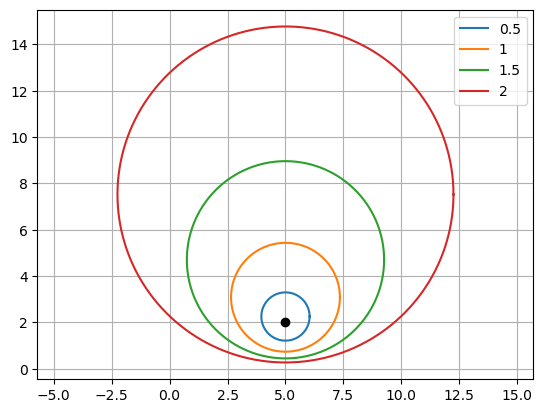

In [4]:
# Hcirc

import numpy as np
import matplotlib.pyplot as plt

x0 = 5
y0 = 2
rads = [1/2, 1, 3/2, 2]
t = np.linspace(0, 2*np.pi, 1000)

for r in rads:  
    R = y0*np.sinh(r)
    plt.plot(x0 + R*np.cos(t), y0*np.cosh(r) + R*np.sin(t))
    
plt.legend(rads)
plt.plot(x0,y0,'ko')

plt.axis('equal')
plt.grid('on')
plt.xlabel('real', fontsize=12)
plt.ylabel('imaginary', fontsize=12);

\begin{myfig}\label{fig:Hcirc} Four concentric Hyperbolic circles. Centered at black dot, colored by radii in legend. \end{myfig} 

### Hyperbolic Triangles and Their Reflections

We build H-triangles from H-lines that intersect at three distinct points. For example, in Figure \ref{fig:htri}(Left) we depict the H-triangle acheived by the intersections of these H-Lines

\begin{equation}\label{eq:3sides}
  \eqalign{C_1 &= \{z:|z+1|=1\} = \{-1+\cos(t_1)+i\sin(t_1): 0\le t_1\le\pi\} \cr
           C_2 &= \{z:|z|=1\} = \{\cos(t_2)+i\sin(t_2): 0\le t_2\le\pi\} \cr
           C_3 &= \{z:|z-1|=1\} = \{1+\cos(t_3)+i\sin(t_3): 0\le t_3\le\pi\} \cr}
\end{equation}

They intersect at the three vertices, 

\begin{equation}\label{eq:3vert}
  v_1 = (-1+\sqrt 3)/2, \hskip 0.25in v_2 = (1+\sqrt 3)/2, \hskip 0.25in v_3 = 0
\end{equation}

and we define the angle at the vertex to be the angle between the tangent vectors at that vertex. 

\begin{exercise}\label{ex:Hang} Use the parametrizations given in (\ref{eq:3sides}) to deduce that the tangent vectors to $C_1$ and $C_2$ at $v_1$ are

\begin{equation}\label{eq:tanvecs}
  \tau_1 = \begin{pmatrix} -\sin(\pi/3) \\ \cos(\pi/3) \end{pmatrix} \and
  \tau_2 = \begin{pmatrix} -\sin(2\pi/3) \\ \cos(2\pi/3) \end{pmatrix}
\end{equation}

Recalling that the inner product of two unit vectors is simply the cosine of the angle between them, evaluate
$\tau_1^T\tau_2$ and deduce that the angle between them is $\pi/3$. Follow this same procedure to show that the angle at $v_2$ is also $\pi/3$ while the angle at $v_3$ is 0.
\end{exercise}

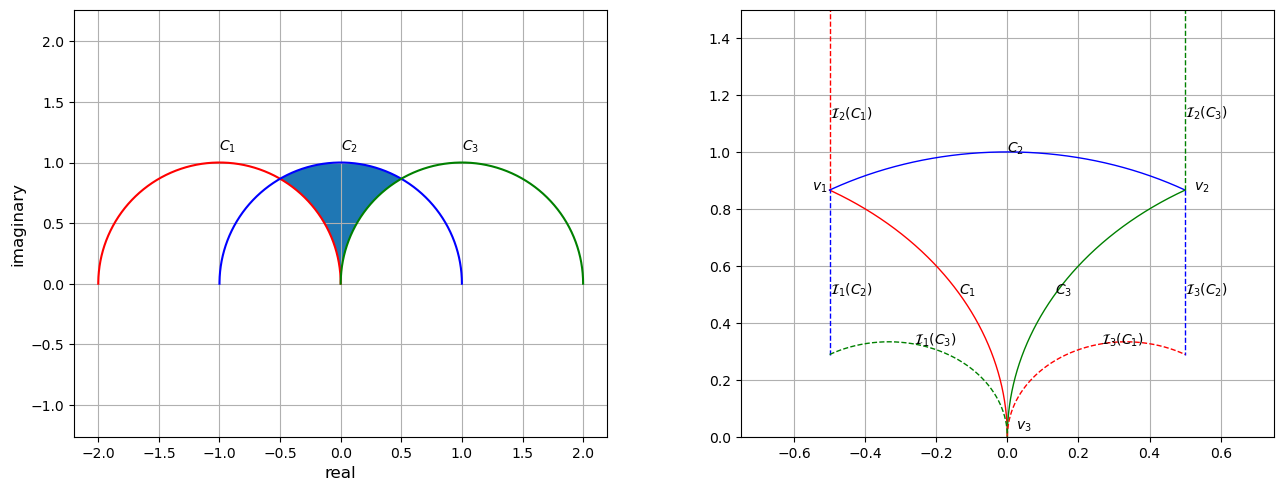

In [77]:
# hyperbolic triangle and its reflections

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

# build and fill the hyperbolic triangle

r = 1
t = np.linspace(0, np.pi, 500)
x = r*np.cos(t)
y = r*np.sin(t)
ax1.plot(x-1,y,'r')
ax1.plot(x,y,'b')
ax1.plot(x+1,y,'g')
ax1.text(-1,1.1,'$C_1$')
ax1.text(0,1.1,'$C_2$')
ax1.text(1,1.1,'$C_3$')

t = np.linspace(0, np.pi/3, 200)   # CW arc of C1
x = -1 + r*np.cos(t)
y = r*np.sin(t)
t = np.linspace(np.pi/3, 2*np.pi/3, 200)  # CW arc of C2
x = np.append(x, -r*np.cos(t))
y = np.append(y, r*np.sin(t))
t = np.linspace(2*np.pi/3, np.pi, 200)  # CW arc of C3
x = np.append(x, 1+r*np.cos(t))
y = np.append(y, r*np.sin(t))
ax1.fill(x,y)
ax1.axis('equal')
ax1.grid('on')
ax1.set_xlabel('real', fontsize=12)
ax1.set_ylabel('imaginary', fontsize=12)

#  draw the triangle

x1 = -1
t = np.linspace(1e-3,np.pi/3,500)
z1 = x1 + r*np.cos(t) + 1j*r*np.sin(t)
ax2.plot(z1.real, z1.imag, 'r', linewidth=1)
ax2.text(z1[250].real, z1[250].imag, '$C_1$')
ax2.text(z1[-1].real-.05, z1[-1].imag, '$v_1$')

x2 = 0
t = np.linspace(np.pi/3,2*np.pi/3,500)
z2 = x2 + r*np.cos(t) + 1j*r*np.sin(t)
ax2.plot(z2.real, z2.imag, 'b', linewidth=1)
ax2.text(z2[250].real, z2[250].imag, '$C_2$')
ax2.text(z2[0].real+.025, z2[0].imag, '$v_2$')
ax2.text(.025, .025, '$v_3$')

x3 = 1
t = np.linspace(2*np.pi/3,np.pi-1e-3,500)
z3 = x3 + r*np.cos(t) + 1j*r*np.sin(t)
ax2.plot(z3.real, z3.imag, 'g', linewidth=1)
ax2.text(z3[250].real, z3[250].imag, '$C_3$')

# reflect blue across green & red

zbar = np.conjugate(z2)
I3z = zbar/(zbar-1)
ax2.plot(I3z.real, I3z.imag, 'b--', linewidth=1)
ax2.text(I3z[250].real, I3z[250].imag, '${\cal I}_3(C_2)$')
I1z = -zbar/(zbar+1)
ax2.plot(I1z.real, I1z.imag, 'b--', linewidth=1)
ax2.text(I1z[250].real, I1z[250].imag, '${\cal I}_1(C_2)$')

# reflect red across green & blue

zbar = np.conjugate(z1)
I3z = zbar/(zbar-1)
ax2.plot(I3z.real, I3z.imag, 'r--', linewidth=1)
ax2.text(I3z[250].real, I3z[250].imag, '${\cal I}_3(C_1)$')
I2z = 1/zbar
ax2.plot(I2z.real, I2z.imag, 'r--', linewidth=1)
ax2.text(I2z[400].real, I2z[400].imag, '${\cal I}_2(C_1)$')

# reflect green across red & blue

zbar = np.conjugate(z3)
I1z = -zbar/(zbar+1)
ax2.plot(I1z.real, I1z.imag, 'g--', linewidth=1)
ax2.text(I1z[250].real, I1z[250].imag, '${\cal I}_1(C_3)$')
I2z = 1/zbar
ax2.plot(I2z.real, I2z.imag, 'g--', linewidth=1)
ax2.text(I2z[100].real, I2z[100].imag, '${\cal I}_2(C_3)$')

ax2.axis([-.75,.75,0,1.5])
ax2.grid('on');

\begin{myfig}\label{fig:htri} (Left) The filled region bounded by arcs of three circles centered on the real axis defines a hyperbolic triangle, $T$. (Right) The reflection of $T$ across each of its sides by the associated inversion, see (\ref{eq:I3}). \end{myfig}

Reflection is inversion about circle centered at $x_k$ of radius $r_k$; $C_k=C(x_k,r_k)$

\begin{equation}\label{eq:INVdef}
  I_{C_k}(z) = \frac{r_k^2 - x_k^2 + x_k\ov z}{\ov z - x_k}
\end{equation}

We fix $r=1$ and $x_1=-1$, $x_2=0$, $x_3=1$ and so

\begin{equation}\label{eq:I3}
  \cI_1(z) = \frac{-\ov z}{\ov z + 1}, \hskip 0.25in \cI_2(z) = \frac{1}{\ov z}, \hskip 0.25in
  \cI_3(z) = \frac{\ov z}{\ov z - 1}
\end{equation}

We depict, in Figure \ref{fig:htri}, the action of each of these reflections on each side of our triangle. As we in turn reflect these reflections we arrive at the tesselations in Figure \ref{fig:Htess}. 

\begin{exercise}\label{ex:Hrot} Recall that products of inversions are M&ouml;bius transformations. Construct these products

\begin{equation}\label{eq:3rot}
  \mu_1 \equiv \cI_1\circ\cI_2, \hskip 0.25in
  \mu_2 \equiv \cI_2\circ\cI_3, \hskip 0.25in
  \mu_3 \equiv \cI_3\circ\cI_2
\end{equation}

and show 

(a) that $v_k$ is a fixed point of $\mu_k$, 

(b) that $\mu_1$ and $\mu_2$ are elliptic and $\mu_1^{(3)}(z)=\mu_2^{(3)}(z) = z$,

(c) that $\mu_3$ is parabolic.
\end{exercise}

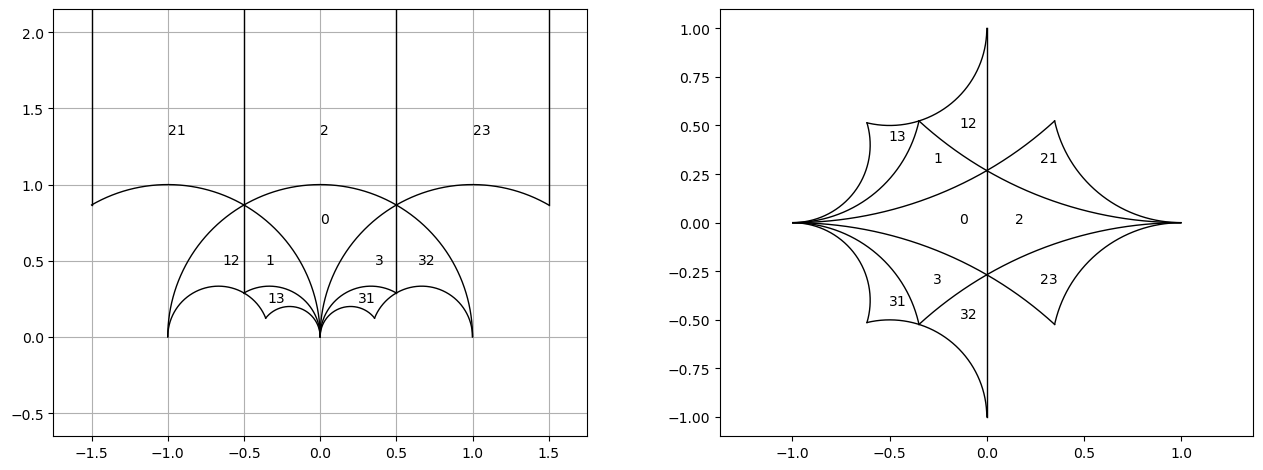

In [96]:
# hyperbolic triangle and its reflections, next level

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

def Cay(z):
    return (z-1j)/(z+1j)

r = 1

x1 = -1
t = np.linspace(1e-3,np.pi/3,500)
z1 = x1 + r*np.cos(t) + 1j*r*np.sin(t)
ax1.plot(z1.real, z1.imag, 'k', linewidth=1)
z1d = Cay(z1)
ax2.plot(z1d.real, z1d.imag, 'k', linewidth=1)

x2 = 0
t = np.linspace(np.pi/3,2*np.pi/3,500)
z2 = x2 + r*np.cos(t) + 1j*r*np.sin(t)
ax1.plot(z2.real, z2.imag, 'k', linewidth=1)
z2d = Cay(z2)
ax2.plot(z2d.real, z2d.imag, 'k', linewidth=1)

x3 = 1
t = np.linspace(2*np.pi/3,np.pi-1e-3,500)
z3 = x3 + r*np.cos(t) + 1j*r*np.sin(t)
ax1.plot(z3.real, z3.imag, 'k', linewidth=1)
z3d = Cay(z3)
ax2.plot(z3d.real, z3d.imag, 'k', linewidth=1)

c = 0 + .75j
ax1.text(c.real, c.imag, '0')   # center of base triangle
cd = Cay(c)
ax2.text(cd.real, cd.imag, '0')

# label regions by reflecting c

cbar = np.conjugate(c)

I3c = cbar/(cbar-1)
ax1.text(I3c.real, I3c.imag, '3')
cd = Cay(I3c)
ax2.text(cd.real, cd.imag, '3')
I13c = -I3c/(I3c+1)
ax1.text(I13c.real, -I13c.imag, '13')
cd = Cay(np.conjugate(I13c))
ax2.text(cd.real, cd.imag, '13')
I23c = 1/I3c
ax1.text(I23c.real, -I23c.imag, '23')
cd = Cay(np.conjugate(I23c))
ax2.text(cd.real, cd.imag, '23')

I1c = -cbar/(cbar+1)
ax1.text(I1c.real, I1c.imag, '1')
cd = Cay(I1c)
ax2.text(cd.real, cd.imag, '1')
I21c = 1/I1c
ax1.text(I21c.real, -I21c.imag, '21')
cd = Cay(np.conjugate(I21c))
ax2.text(cd.real, cd.imag, '21')
I31c = I1c/(I1c-1)
ax1.text(I31c.real-.1, -I31c.imag, '31')
cd = Cay(np.conjugate(I31c))
ax2.text(cd.real, cd.imag, '31')

I2c = 1/cbar
ax1.text(I2c.real, I2c.imag, '2')
cd = Cay(I2c)
ax2.text(cd.real, cd.imag, '2')
I12c = -I2c/(I2c+1)
ax1.text(I12c.real, -I12c.imag, '12')
cd = Cay(np.conjugate(I12c))
ax2.text(cd.real, cd.imag, '12')
I32c = I2c/(I2c-1)
ax1.text(I32c.real, -I32c.imag, '32')
cd = Cay(np.conjugate(I32c))
ax2.text(cd.real, cd.imag, '32')

# reflect blue across green & red

zbar = np.conjugate(z2)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I3z)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)

zbar = np.conjugate(z2)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I1z)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)

# reflect red across green & blue

zbar = np.conjugate(z1)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I3z)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)

zbar = np.conjugate(z1)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I2z)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)

# reflect green across red & blue

zbar = np.conjugate(z3)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I1z)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)

zbar = np.conjugate(z3)
I2z = 1/zbar
ax1.plot(I2z.real, I2z.imag, 'k', linewidth=1)
I2zd = Cay(I2z)
ax2.plot(I2zd.real, I2zd.imag, 'k', linewidth=1)
zbar = np.conjugate(I2z)
I1z = -zbar/(zbar+1)
ax1.plot(I1z.real, I1z.imag, 'k', linewidth=1)
I1zd = Cay(I1z)
ax2.plot(I1zd.real, I1zd.imag, 'k', linewidth=1)
I3z = zbar/(zbar-1)
ax1.plot(I3z.real, I3z.imag, 'k', linewidth=1)
I3zd = Cay(I3z)
ax2.plot(I3zd.real, I3zd.imag, 'k', linewidth=1)

ax1.axis('equal')
ax1.axis([-1.75,1.75,0,1.5])
ax1.grid('on')

ax2.axis('equal');

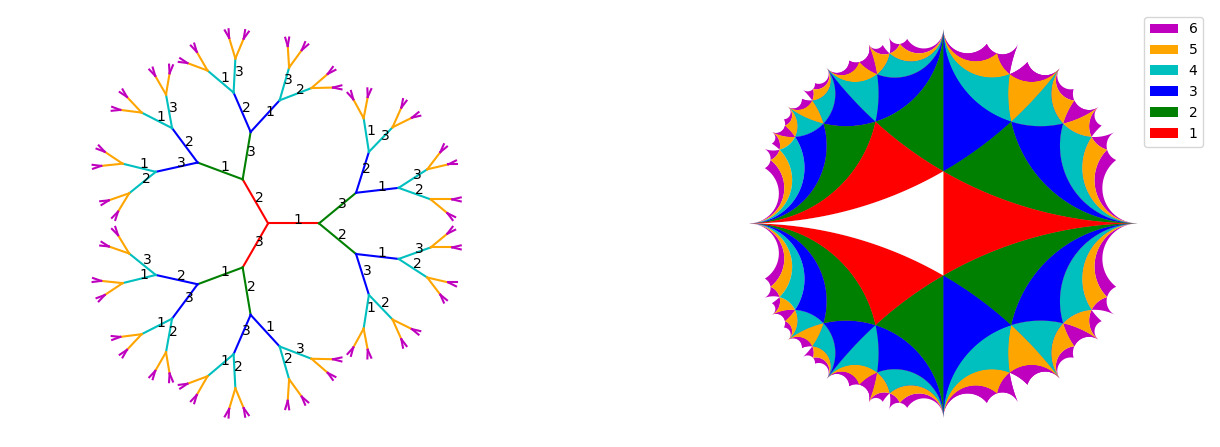

In [207]:
# Breadth First Search on Tesselation by reflections of H-triangle with angles pi/3, pi/3, 0

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

def Cay(z):
    return (z-1j)/(z+1j)

def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

def PlotTri(T, lev, col):
    if (np.mod(lev,2) == 1):     # if level is odd then conjugate curve
        z = np.conjugate(C)
    else:
        z = C
    TC = (T[0,0]*z + T[0,1])/(T[1,0]*z + T[1,1])  # apply the map
    TCd = Cay(TC)                # transform to unit disk
    ax2.fill(TCd.real, TCd.imag, col, label=str(lev))  # color and label by level

# build and bundle the three inversions

I1 = np.array([[-1,0],[1,1]])
I2 = np.array([[0,1],[1,0]])
I3 = np.array([[1,0],[1,-1]])

gens = np.array([I1, I2, I3])   #   (3,2,2)  

# build and bundle the three arcs

t = np.linspace(1e-3,np.pi/3,100)
C1 = -1 + np.cos(t) + 1j*np.sin(t)
t = np.arange(2*np.pi/3, np.pi/3, -np.pi/300 )
C2 = np.cos(t) + 1j*np.sin(t)
t = np.linspace(2*np.pi/3,np.pi-1e-3,100)
C3 = 1 + np.cos(t) + 1j*np.sin(t)
C = np.hstack([C1, C2, C3])

colormap = ['r','g','b','c','orange','m','k']

bigN = 800

ga = np.zeros(bigN)   # graph angles and coordinates
gx = np.zeros(bigN)
gy = np.zeros(bigN)

group = np.zeros((bigN,2,2))
tag = np.zeros(bigN, dtype=int)
levmax = 6
num = np.zeros(levmax+1, dtype=int)

r = 17/18

for j in range(3):
    group[j] = gens[j]
    tag[j] = j
    ga[j] = 2*j*np.pi/3
    gx[j] = r*np.cos(ga[j])
    gy[j] = r*np.sin(ga[j])
    ax1.plot([0, gx[j]], [0, gy[j]], colormap[0])
    ax1.text(gx[j]/2, gy[j]/2, str(j+1))
    
num[0] = 0
num[1] = 3

for lev in range(1,levmax):   # build the transformations and graph coords
    inew = num[lev]
    r = r*r  # decreasing radius
    for iold in range(num[lev-1], num[lev]):
        for j in range(1,3):
            k = np.mod(tag[iold] + j, 3) 
            group[inew] = gens[k] @ group[iold] #@ gens[k]
            ga[inew] = ga[iold] + (-1)**j*(np.pi/3.9)*(1-lev/(levmax+1)) # decreasing aperture
            gx[inew] = gx[iold] + r*np.cos(ga[inew])
            gy[inew] = gy[iold] + r*np.sin(ga[inew])
            ax1.plot([gx[iold], gx[inew]], [gy[iold], gy[inew]], colormap[lev])
            if (lev<4): ax1.text((gx[iold]+gx[inew])/2, (gy[iold]+gy[inew])/2, str(k+1))
            tag[inew] = k
            inew = inew + 1
    num[lev+1] = inew
    
# work backwards and paint by level

for lev in range(levmax,0,-1):
    for val in range(num[lev],num[lev-1],-1):
            PlotTri(group[val-1], lev, colormap[lev-1]) 
                     
Cd = Cay(C)
ax2.fill(Cd.real, Cd.imag, 'w')  # level 0

ax1.axis('equal')
ax1.axis('off')

legend_without_duplicate_labels(ax2)
                 
ax2.axis('equal')
ax2.axis('off');

\begin{myfig}\label{fig:Htess} Tesselation of the Poincare disk by triangles. \end{myfig}

### Hyperbolic Area

We estimate the Euclidean area of a planar region by summing the area of the small squares within it. Our key question is how this area is distorted by a M&ouml;bius transformation. Given a square, $Q$, centered at $z_0=x_0+iy_0$ of Euclidian side length $\eps$ we study its deformation by $\mu$ via the linear approximation

\begin{equation}\label{eq:mugrad}
   \begin{pmatrix} u(x_0+x,y_0+y) \\ v(x_0+x,y_0+y) \end{pmatrix} = \begin{pmatrix} u(x_0,y_0) \\ v(x_0,y_0) \end{pmatrix}
   + \begin{pmatrix} \frac{\p u}{\p x}(x_0,y_0) & \frac{\p u}{\p y}(x_0,y_0) \\ \frac{\p v}{\p x}(x_0,y_0) & \frac{\p v}{\p y}(x_0,y_0)\end{pmatrix}\begin{pmatrix} x \\ y \end{pmatrix}
\end{equation}

That is, the value of $\mu$ in the square is a translated linear transformation of the square. This linear transformation is called the **gradient** of $\mu$ at $z_0$, and is written

\begin{equation}\label{eq:mugrad1}
   \nabla\mu(z_0) \equiv \begin{pmatrix} \frac{\p u}{\p x}(x_0,y_0) & \frac{\p u}{\p y}(x_0,y_0) \\ \frac{\p v}{\p x}(x_0,y_0) & \frac{\p v}{\p y}(x_0,y_0)\end{pmatrix}
\end{equation}

We know from our early work that the determinant captures the distortion of area by such transformations. As such,

\begin{equation}\label{eq:E-Area}
   \hbox{E-Area}(\mu(Q)) \approx \det(\nabla\mu(z_0))\hbox{E-Area(Q)}
\end{equation}

To evaluate this we recall from (\ref{eq:muRI}) the real and imaginary parts

\begin{equation}\label{eq:muRIh}
 \eqalign{
  u(x,y) &= \frac{ac|z|^2+bd + (ad+bc)x}{|cz+d|^2} =  \frac{ac(x^2+y^2)+bd + (ad+bc)x}{c^2(x^2+y^2)+2cdx + d^2} \cr
  v(x,y) &= \frac{y}{|cz+d|^2} = \frac{y}{c^2(x^2+y^2)+2cdx + d^2}\cr}
\end{equation}

and use the sympy library 

In [4]:
# Evaluate the Jacobian of a real Mobius transformation
import sympy as sym    
a, b, c, d, x, y = sym.symbols('a, b, c, d, x, y')
den = c**2*(x**2+y**2) + 2*c*d*x + d**2
u = (a*c*(x**2+y**2) + b*d + (a*d+b*c)*x) / den
v = y / den
ux = sym.diff(u, x) # the derivative of u with respect to x
uy = sym.diff(u, y)
vx = sym.diff(v, x)
vy = sym.diff(v, y)
J = sym.factor(ux*vy - uy*vx)
print('J = ', J)    # in symbols

J =  (a*d - b*c)/(c**2*x**2 + c**2*y**2 + 2*c*d*x + d**2)**2


to achieve

\begin{equation}\label{eq:Jac}
  \boxed{\det(\nabla\mu(z_0)) = \frac{1}{|cz_0+d|^4}}
\end{equation}

With this we partition a general region $R$ into many small squares and arrive at

\begin{equation}\label{eq:EareaR}
  \hbox{E-Area}(\mu(R)) = \int_{\mu(R)}dudv = \int_R \det(\nabla\mu(x,y))\,dxdy
\end{equation}

If we now define the H-area via

\begin{equation}\label{eq:HareaR}
  \hbox{H-Area}(R) = \int_R \frac{dxdy}{y^2}
\end{equation}

then

\begin{equation}\label{eq:HareaR2}
  \hbox{H-Area}(\mu(R)) = \int_{\mu(R)} \frac{dudv}{v^2} = \int_R \frac{\det(\nabla\mu(x,y))}{v^2(x,y)}\,dxdy
  = \int_R \frac{1}{|c(x+iy)+d|^4}\frac{|c(x+iy)+d|^4}{y^2}\,dxdy = \hbox{H-Area}(R)
\end{equation}

We now prove

\begin{proposition}\label{prop:HAtri} If $\Delta$ is a hyperbolic triangle with angles $\alpha$, $\beta$, and $\gamma$ then
H-area$(\Delta)=\pi-\alpha-\beta-\gamma$.
\end{proposition}

**Proof:** We consider three scenarios. In the **first case**  we assume that two sides are parallel vertical lines. By (\ref{eq:HareaR2}) we can shift and scale in order that the circular side is an arc of the unit circle, as depicted in
Figure \ref{fig:HAtri}. In this setting we find explicitly that

\begin{equation}\label{eq:htric1}
  \eqalign{
  \hbox{H-area}(\Delta) = \int_\Delta\frac{dxdy}{y^2} &= \int_a^b\int_{\sqrt{1-x^2}}^\infty y^{-2}\,dydx \cr
   &= \int_a^b\int_{\sqrt{1-x^2}}^\infty (-y^{-1})'\,dydx \cr
   &= \int_a^b\frac{dx}{\sqrt{1-x^2}} \cr
   &= \int_{\pi-\alpha}^{\beta} \frac{-\sin(\theta)\,d\theta}{\sqrt{1-\cos(\theta)^2}} \cr
   &= -\int_{\pi-\alpha}^{\beta} d\theta = \pi-\alpha-\beta \cr}
\end{equation}

as claimed. In the **second case** we assume that $\Delta$ has a real vertex. The associated angle must be 0 and we can map this vertex to $\infty$ by a real M&ouml,bius transformation, without effecting its H-area. This returns us to case 1.

In the **third case** we suppose that $\Delta$ has no real vertex.









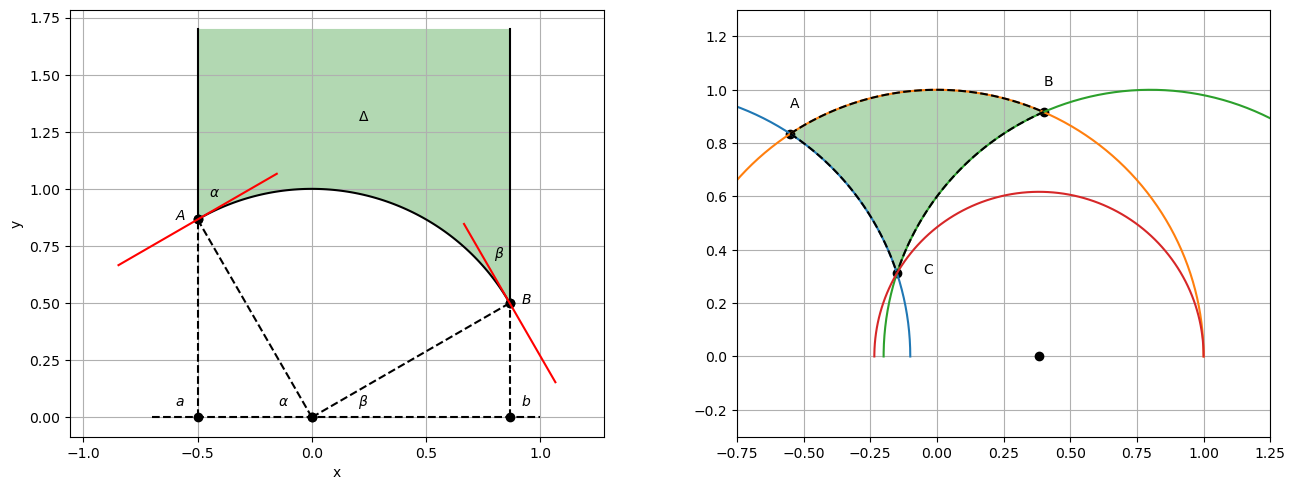

In [67]:
# hyperbolic triangle, area computation

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, (ax1, ax2) = plt.subplots(1,2)
plt.subplots_adjust(right=2, top=1, wspace=0.25)

# Case 1

t = np.linspace(np.pi/6, 2*np.pi/3, 100)
ax1.plot(np.cos(t), np.sin(t),'k')
ax1.plot([np.cos(t[0]), np.cos(t[0])], [np.sin(t[0]), 1.7], 'k')
ax1.plot([np.cos(t[0]), np.cos(t[0])], [0, np.sin(t[0])], 'ko--')
ax1.plot([0,np.cos(t[0])], [0, np.sin(t[0])], 'ko--')
ax1.plot([np.cos(t[-1]), np.cos(t[-1])], [np.sin(t[-1]), 1.7], 'k')
ax1.plot([np.cos(t[-1]), np.cos(t[-1])], [0, np.sin(t[-1])], 'ko--')
ax1.plot([0,np.cos(t[-1])], [0, np.sin(t[-1])], 'ko--')
ax1.plot([-.7,1],[0,0], 'k--')
xf = np.hstack([np.cos(t[0]), np.cos(t), np.cos(t[-1])])
yf = np.hstack([1.7, np.sin(t), 1.7])
ax1.fill(xf, yf, 'g', alpha=0.3)
ax1.text(0.2, 1.3, '$\Delta$')

# draw tangents and label points

h = np.linspace(-0.4,0.4,20)
xta = np.cos(t[-1]) - h*np.sin(t[-1])
yta = np.sin(t[-1]) + h*np.cos(t[-1])
ax1.plot(xta, yta, 'r')
ax1.text(np.cos(t[-1])+.05, np.sin(t[-1])+.1, '$\\alpha$')
ax1.text(-.15, 0.05, '$\\alpha$')
ax1.text(np.cos(t[-1])-.1, np.sin(t[-1]), '$A$')
ax1.text(np.cos(t[-1])-.1, 0.05, '$a$')
xtb = np.cos(t[0]) - h*np.sin(t[0])
ytb = np.sin(t[0]) + h*np.cos(t[0])
ax1.plot(xtb, ytb, 'r')
ax1.text(np.cos(t[0])-.07, np.sin(t[0])+.2, '$\\beta$')
ax1.text(0.2, 0.05, '$\\beta$')
ax1.text(np.cos(t[0])+.05, np.sin(t[0]), '$B$')
ax1.text(np.cos(t[0])+.05, 0.05, '$b$')

ax1.set_xlabel('x')
ax1.set_ylabel('y')

ax1.axis('equal')
ax1.grid('on')

# Case 3, H-triangle defined by unit circles centered at a, 0, and b

a = -1.1
xa = a/2
ya = np.sqrt(1-xa**2)   # vertex A
ax2.plot(xa,ya,'ko')
ax2.text(xa,ya+.1,'A')

b = 0.8
xb = b/2
yb = np.sqrt(1-xb**2)    # vertex B
ax2.plot(xb,yb,'ko')
ax2.text(xb,yb+.1,'B')

xc = (a+b)/2
yc = np.sqrt(1-(xc-b)**2)   # vertex C
ax2.plot(xc,yc,'ko')
ax2.text(xc+.1,yc,'C')

xd = (1-xc**2-yc**2)/(2*(1-xc))   # vertex D
r = 1-xd

t = np.linspace(0, np.pi, 200)
ax2.plot(a + np.cos(t), np.sin(t))
ax2.plot(np.cos(t), np.sin(t))
ax2.plot(b + np.cos(t), np.sin(t))

ta = np.arctan2(ya,xa)
tb = np.arctan2(yb,xb)
tab = np.linspace(ta, tb, 100)
ax2.plot(np.cos(tab), np.sin(tab), 'k--')

tb = np.arctan2(yb,xb-b)
tc = np.arctan2(yc, xc-b)
tbc = np.linspace(tb, tc, 100)
ax2.plot(b+np.cos(tbc), np.sin(tbc), 'k--')

ta = np.arctan2(ya,xa-a)
tc = np.arctan2(yc, xc-a)
tac = np.linspace(ta, tc, 100)
ax2.plot(a+np.cos(tac), np.sin(tac), 'k--')

xf = np.hstack([np.cos(tab), b+np.cos(tbc), np.flip(a+np.cos(tac))])
yf = np.hstack([np.sin(tab), np.sin(tbc), np.flip(np.sin(tac))])
ax2.fill(xf, yf, 'g', alpha=0.3)


ax2.plot(xd,0,'ko')
ax2.plot(xd + r*np.cos(t), r*np.sin(t))

ax2.axis('equal')
ax2.set_xlim([-0.75,1.25])
ax2.grid('on');

\begin{myfig}\label{fig:HAtri} A green hyperbolic triangle with vertices at $A$, $B$, and $\infty$. The red tangent lines at $A$ and $B$ define the angles $\alpha$ and $\beta$. By the dashed construction we find that $\alpha=\angle A0a$ and $\beta=\angle B0b$. \end{myfig}